In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#ml libraries
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [9]:
# Load the Iris dataset from a CSV file
df = pd.read_csv("iris[1].csv")

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
#let's make x an y in our data
x=df.drop('species' , axis=1)
y=df['species']

In [18]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [21]:
# Create an SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [23]:
#Evaluate the model
print("Confusion matrix result : " , confusion_matrix(y_test , y_pred))
print("Classification report result: \n", classification_report(y_test, y_pred))      

Confusion matrix result :  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification report result: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
#Accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))


Accuracy score:  1.0


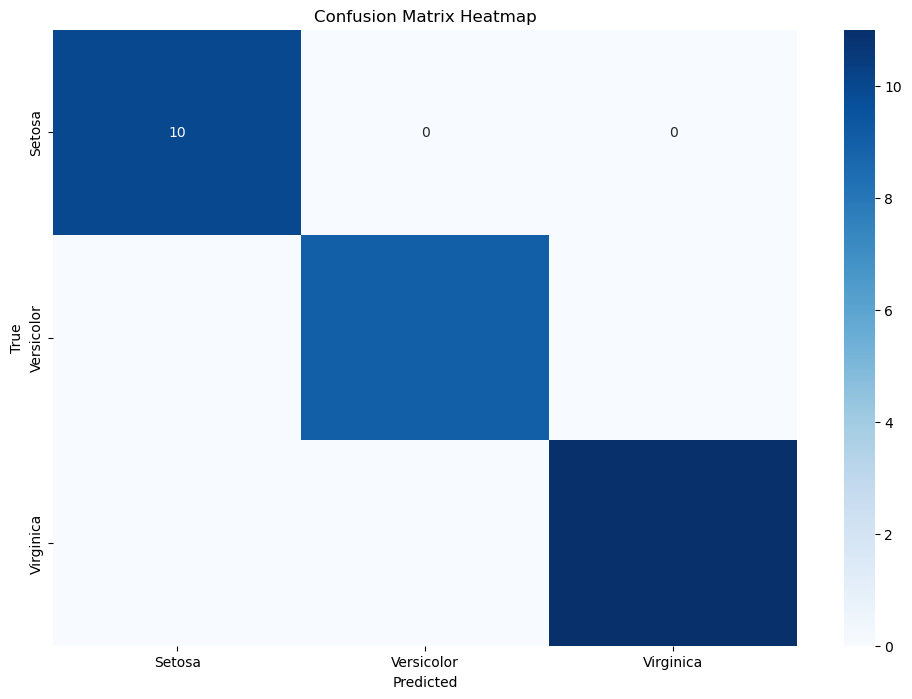

In [35]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Set up the figure size and plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

In [33]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64